In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import os

# Compiling All Listening Data
This section brings all the 10MB json files together into 1 data frame. Spotify provides a lot of information when you make a full data request, but the streaming information is located in files that start with 'endsong'. Each of these files is about 10MB.

In [7]:
path = 'MyData/' #whatever your unzipped folder is named that contains all SpotifyData

song_files = [pos_json for pos_json in os.listdir(path) if pos_json.startswith('endsong')]
print(song_files)

df = pd.read_json(path+song_files[0])
for file in song_files[1:]:
    df_temp = pd.read_json(path+file)
    df = df.append(df_temp)
df = df.sort_values(by='ts')
df = df.reset_index(drop=True)
df['ts'] = pd.to_datetime(df['ts'])
df

['endsong_3.json', 'endsong_2.json', 'endsong_5.json', 'endsong_8.json', 'endsong_4.json', 'endsong_7.json', 'endsong_6.json', 'endsong_1.json', 'endsong_0.json']


,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2012-08-29 23:40:25+00:00,1245898731,OS X 10.7.4 [x86 4],12509,US,99.67.237.197,unknown,Daylight,Matt and Kim,Grand,...,None,None,None,remote,,False,1.0,False,0,0.0
1,2012-08-29 23:42:29+00:00,1245898731,OS X 10.7.4 [x86 4],23492,US,99.67.237.197,unknown,Daylight,Matt and Kim,Grand,...,None,None,None,,popup,False,1.0,False,0,0.0
2,2012-08-29 23:44:55+00:00,1245898731,OS X 10.7.4 [x86 4],107902,US,99.67.237.197,unknown,Make It Bun Dem,Skrillex,Make It Bun Dem,...,None,None,None,popup,popup,False,1.0,False,0,0.0
3,2012-08-29 23:46:16+00:00,1245898731,OS X 10.7.4 [x86 4],81785,US,99.67.237.197,unknown,Too Close,Alex Clare,The Lateness Of The Hour,...,None,None,None,popup,uriopen,False,1.0,False,0,0.0
4,2012-08-29 23:47:21+00:00,1245898731,OS X 10.7.4 [x86 4],65687,US,99.67.237.197,unknown,Some Nights,fun.,Some Nights,...,None,None,None,uriopen,uriopen,False,1.0,False,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143060,2021-12-27 23:22:01+00:00,1245898731,"iOS 15.1 (iPhone12,1)",29442,US,66.196.7.246,unknown,Back On The Boulevard - Original Mix,Purple Velvet,Sparks Fly EP,...,None,None,None,trackdone,endplay,True,NaN,False,1640647290405,0.0
143061,2021-12-27 23:22:03+00:00,1245898731,"iOS 15.1 (iPhone12,1)",1462,US,66.196.7.246,unknown,Havana Burning,Dan Reeder,Dan Reeder,...,None,None,None,playbtn,fwdbtn,True,NaN,False,1640647321033,0.0
143062,2021-12-27 23:26:30+00:00,1245898731,"iOS 15.1 (iPhone12,1)",268857,US,66.196.7.246,unknown,Summer,Skinshape,Oracolo,...,None,None,None,fwdbtn,trackdone,True,NaN,False,1640647322529,0.0
143063,2021-12-27 23:28:29+00:00,1245898731,"iOS 15.1 (iPhone12,1)",124693,US,66.196.7.246,unknown,Norwegian Wood (This Bird Has Flown) - Remaste...,The Beatles,Rubber Soul,...,None,None,None,trackdone,trackdone,True,NaN,False,1640647584208,0.0


In [8]:
df.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [145]:
df.to_csv('export.csv')

# Exploratory Data Analysis

In [9]:
df['conn_country'].value_counts()

US    139756
ZZ      2257
MX       339
CA       271
KY       150
DE       104
NZ        82
CN        58
AU        25
FI        16
DJ         5
GM         2
Name: conn_country, dtype: int64

,ts,ms_played,Month,Year
0,2012-08-31 00:00:00+00:00,445951,8,2012
1,2012-09-30 00:00:00+00:00,0,9,2012
2,2012-10-31 00:00:00+00:00,57950,10,2012
3,2012-11-30 00:00:00+00:00,987901,11,2012
4,2012-12-31 00:00:00+00:00,62692,12,2012
...,...,...,...,...
108,2021-08-31 00:00:00+00:00,379374336,8,2021
109,2021-09-30 00:00:00+00:00,187117627,9,2021
110,2021-10-31 00:00:00+00:00,427556022,10,2021
111,2021-11-30 00:00:00+00:00,316455212,11,2021


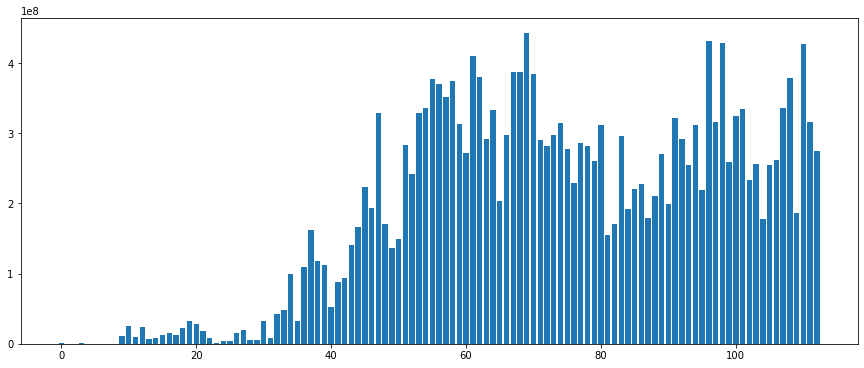

In [74]:
df_month = df.groupby(pd.Grouper(key='ts', 
                      axis=0, 
                      freq='M', 
                      sort=True)).sum()[['ms_played']].reset_index()
df_month['Month'] = df_month['ts'].dt.month #+ df_month['ts'].dt.year
df_month['Year']  = df_month['ts'].dt.year
display(df_month)
plt.bar(df_month.index, df_month['ms_played'])
fig = plt.gcf()
fig.set_size_inches(15,6)

In [11]:
reason_starts = df['reason_start'].value_counts()
reason_ends = df['reason_end'].value_counts()
df_reasons = reason_starts.to_frame().join(reason_ends)
df_reasons

,reason_start,reason_end
trackdone,74942,75742.0
fwdbtn,36626,36643.0
clickrow,20656,1840.0
unknown,2316,2539.0
backbtn,2302,2283.0
playbtn,2120,NaN
remote,1609,1920.0
appload,1279,NaN
popup,825,799.0
trackerror,237,87.0


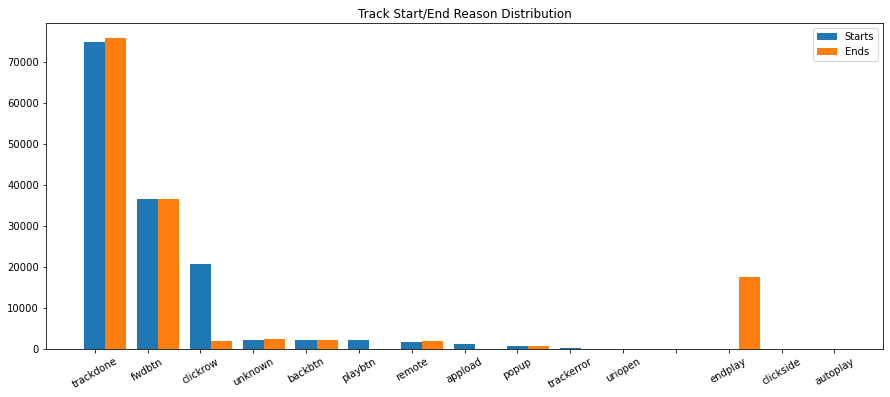

In [12]:
index = np.arange(len(df_reasons))
bar_width = 0.4

fig, ax = plt.subplots()
starts = ax.bar(index, 
                df_reasons['reason_start'],
                bar_width,
                label="Starts")

ends = ax.bar(index+bar_width,
              df_reasons['reason_end'],
              bar_width, 
              label="Ends")

plt.xticks(index, df_reasons.index, rotation=30)
plt.title('Track Start/End Reason Distribution')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)

In [13]:
df['offline'].value_counts()

False    139911
True       3154
Name: offline, dtype: int64

# Top Songs, Artists, Albums (ALL TIME)

In [133]:
df_songs = df.groupby(['master_metadata_track_name', 
                       'master_metadata_album_artist_name', 
                       'master_metadata_album_album_name'])['ms_played'].agg(['sum',
                                                                              'count']).sort_values(by='sum', ascending=False).reset_index()
df_songs = df_songs.rename(columns={
    'sum': 'ms_played',
    'master_metadata_track_name':'track',
    'master_metadata_album_artist_name':'artist',
    'master_metadata_album_album_name':'album',
#     'spotify_track_uri':'uri'
})
#21965 unique songs listed
df_songs = df_songs[df_songs['ms_played']>60000] #listened to it for at least 1 minute
#17237

display(df_songs.head(25))
df_songs.info()

,track,artist,album,ms_played,count
0,Only Yesterday,Pretty Lights,Only Yesterday,60279281,194
1,You & Me - Flume Remix,Disclosure,Settle (The Remixes),40134916,208
2,Oldie,Odd Future,The OF Tape Vol. 2,39810248,95
3,The Time Has Come,Pretty Lights,Filling up the City Skies (Disc 1),35317978,136
4,One Day They'll Know (ODESZA Remix),Pretty Lights,A Color Map of the Sun (Remixes),34900039,166
5,Suite: Judy Blue Eyes - 2005 Remaster,"Crosby, Stills & Nash","Crosby, Stills & Nash",32947034,93
6,Finally Moving,Pretty Lights,Taking up Your Precious Time,31036502,145
7,Solamente,Pretty Lights,Filling up the City Skies (Disc 1),30944761,99
8,Atlantic City,The Band,Jericho,29796094,128
9,This Must Be the Place (Naive Melody) - 2005 R...,Talking Heads,Speaking in Tongues,29178815,136


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18023 entries, 0 to 18022
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   track      18023 non-null  object
 1   artist     18023 non-null  object
 2   album      18023 non-null  object
 3   ms_played  18023 non-null  int64 
 4   count      18023 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 844.8+ KB


In [137]:
df_artists = df.groupby(['master_metadata_album_artist_name'])['ms_played'].agg(['sum',
                                                                              'count']).sort_values(by='sum', ascending=False).reset_index()
df_artists = df_artists.rename(columns={
    'sum': 'ms_played',
    'master_metadata_track_name':'track',
    'master_metadata_album_artist_name':'artist',
    'master_metadata_album_album_name':'album',
#     'spotify_track_uri':'uri'
})
#7060 unique artists listed
df_artists = df_artists[df_artists['ms_played']>60000] #listened to it for at least 1 minute
#5610

display(df_artists.head(25))
df_artists.info()

,artist,ms_played,count
0,Pretty Lights,946873931,4117
1,ODESZA,510100863,3632
2,Grateful Dead,339901194,1558
3,Mac Miller,209318248,1242
4,Flume,192121506,1615
5,GRiZ,190722548,1265
6,Tame Impala,159389667,891
7,Tipper,136935847,778
8,Louis The Child,126654953,865
9,Steely Dan,125771450,609


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 5609
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist     5610 non-null   object
 1   ms_played  5610 non-null   int64 
 2   count      5610 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 175.3+ KB


In [142]:
df_albums = df.groupby(['master_metadata_album_album_name',
                        'master_metadata_album_artist_name'])['ms_played'].agg(['sum',
                                                                                'count']).sort_values(by='sum', ascending=False).reset_index()
df_albums = df_albums.rename(columns={
    'sum': 'ms_played',
    'master_metadata_track_name':'track',
    'master_metadata_album_artist_name':'artist',
    'master_metadata_album_album_name':'album',
#     'spotify_track_uri':'uri'
})
#15924 unique albums listed
df_albums = df_albums[df_albums['ms_played']>60000] #listened to it for at least 1 minute
#11659

display(df_albums.head(25))
df_albums.info()

,album,artist,ms_played,count
0,Filling up the City Skies (Disc 1),Pretty Lights,244977006,1001
1,In Return (Deluxe Edition),ODESZA,189102156,1233
2,The Very Best of the Grateful Dead,Grateful Dead,134535585,638
3,A Color Map of the Sun (Deluxe Version),Pretty Lights,130681687,616
4,Taking up Your Precious Time,Pretty Lights,121955688,622
5,Summer's Gone,ODESZA,110108583,806
6,Glowing In The Darkest Night,Pretty Lights,69868948,288
7,A Moment Apart,ODESZA,63633526,482
8,Classics,Ratatat,62290541,489
9,Flume,Flume,62133088,508


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11659 entries, 0 to 11658
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   album      11659 non-null  object
 1   artist     11659 non-null  object
 2   ms_played  11659 non-null  int64 
 3   count      11659 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 455.4+ KB


In [214]:
dates = pd.date_range(min(df['ts']), 
                          max(df['ts']),
                         freq='M')
dates

DatetimeIndex(['2012-08-31 23:40:25+00:00', '2012-09-30 23:40:25+00:00',
               '2012-10-31 23:40:25+00:00', '2012-11-30 23:40:25+00:00',
               '2012-12-31 23:40:25+00:00', '2013-01-31 23:40:25+00:00',
               '2013-02-28 23:40:25+00:00', '2013-03-31 23:40:25+00:00',
               '2013-04-30 23:40:25+00:00', '2013-05-31 23:40:25+00:00',
               ...
               '2021-02-28 23:40:25+00:00', '2021-03-31 23:40:25+00:00',
               '2021-04-30 23:40:25+00:00', '2021-05-31 23:40:25+00:00',
               '2021-06-30 23:40:25+00:00', '2021-07-31 23:40:25+00:00',
               '2021-08-31 23:40:25+00:00', '2021-09-30 23:40:25+00:00',
               '2021-10-31 23:40:25+00:00', '2021-11-30 23:40:25+00:00'],
              dtype='datetime64[ns, UTC]', length=112, freq='M')

In [231]:
date_list = []
artist_list = []
ms_list = []
for i in np.arange(len(dates.values[:-1])):
    start_date = dates[i]
    end_date = dates[i+1]
    mask = (df['ts'] > start_date) & (df['ts'] <= end_date)

    #filter df to only be between selected dates
    df_temp = df.loc[mask]
    df_temp = df_temp.groupby(['master_metadata_album_artist_name'])['ms_played'].agg(['sum']).sort_values(by='sum', ascending=False).reset_index()
    try:
        top_artist = df_temp['master_metadata_album_artist_name'].values[0]
        ms_played = df_temp['sum'].values[0]
    #when no values
    except: 
        top_artist = 'None'
        ms_played = 0
#     print(end_date.month,end_date.year, top_artist, ms_played)
    
    date_list.append(end_date)
    artist_list.append(top_artist)
    ms_list.append(ms_played)
    
#     print(i, artist_list)

#outside
data = {
    'date': date_list,
    'artist_name': artist_list,
    'ms_played': ms_list
}

top_month = pd.DataFrame(data)
 
# Print the output.
top_month.tail(20)

,date,artist_name,ms_played
91,2020-04-30 23:40:25+00:00,Grateful Dead,15663805
92,2020-05-31 23:40:25+00:00,The Dynamics,11694352
93,2020-06-30 23:40:25+00:00,Grateful Dead,12837298
94,2020-07-31 23:40:25+00:00,Grateful Dead,10414395
95,2020-08-31 23:40:25+00:00,Pretty Lights,16495342
96,2020-09-30 23:40:25+00:00,GRiZ,11131109
97,2020-10-31 23:40:25+00:00,GRiZ,11283781
98,2020-11-30 23:40:25+00:00,Pretty Lights,18769451
99,2020-12-31 23:40:25+00:00,Pretty Lights,7911038
100,2021-01-31 23:40:25+00:00,Emancipator,6279522
